# Série V
Nonlinear Time Series Analysis - Computer Science Master's Degree Course - Federal University of São Paulo (UNIFESP) - Prof. Elbert E. N. Macau

Author: Rafael Leiniö


## Algorithm Implementations

- [Tent Map](https://github.com/rafaelleinio/ntsa/blob/master/ntsa/algorithms/maps/tent.py)
- [Henon Map](https://github.com/rafaelleinio/ntsa/blob/master/ntsa/algorithms/maps/henon.py)
- [Lorenz Map](https://github.com/rafaelleinio/ntsa/blob/master/ntsa/algorithms/maps/lorenz.py)
- [Rössler Map](https://github.com/rafaelleinio/ntsa/blob/master/ntsa/algorithms/maps/rossler.py)
- [Lyapunov Exponents](https://github.com/rafaelleinio/ntsa/blob/master/ntsa/algorithms/maps/lyapunov_exponents.py)

In [1]:
# fix working dir
import pathlib
import os
path = os.path.join(pathlib.Path().absolute(), '../..')
os.chdir(path)

In [2]:
# imports
import numpy as np
import pylab as pl
from matplotlib import collections  as mc
import matplotlib.pyplot as plt
import itertools

In [3]:
# functions

def plot_lines(ax, base_figure, base_color, figure_list=[], figures_color=[]):
    lines = [*base_figure, *figure_list]
    colors = [base_color, base_color, *([figures_color] * len(figure_list))]
    lc = mc.LineCollection(lines, colors=colors, linewidths=2)
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

def generate_orbit_xyz(initial_condition, map_, dt, steps):
    xs = np.empty(steps + 1)
    ys = np.empty(steps + 1)
    zs = np.empty(steps + 1)
    xs[0], ys[0], zs[0] = initial_condition

    for i in range(number_of_points):
        x_dot, y_dot, z_dot = map_.dot_xyz(xs[i], ys[i], zs[i])
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
    return xs, ys, zs

In [4]:
# My lib
from ntsa.algorithms.maps.lyapunov_exponents import LyapunovExponents

# Exercise 1
## Tent
## a)

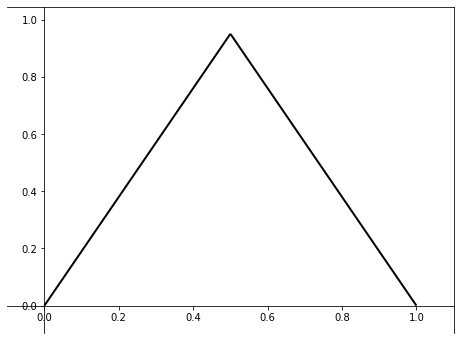

In [5]:
# Tent Map
black = (0, 0, 0, 1)
u = 1.9

base_figure = [[(0, 0), (1/2, u/2)], [(1/2, u/2), (1, 0)]]

fig, axes = plt.subplots(figsize=(8, 6), sharex=True, sharey=True)
plot_lines(axes, base_figure=base_figure, base_color=black)

In [6]:
# trajectory with u=1.9 and start_point=0.4

from ntsa.algorithms.maps.tent import Tent

tent = Tent(u=1.9)
start_point = 0.4

current_point = start_point
print("x0 =", current_point)
for i in range(24):
    current_point = tent.f([current_point]).take(0)
    print(f"x{i + 1} =", current_point)

x0 = 0.4
x1 = 0.76
x2 = 0.45599999999999996
x3 = 0.8663999999999998
x4 = 0.2538400000000003
x5 = 0.4822960000000005
x6 = 0.9163624000000009
x7 = 0.15891143999999827
x8 = 0.3019317359999967
x9 = 0.5736702983999936
x10 = 0.8100264330400121
x11 = 0.360949777223977
x12 = 0.6858045767255562
x13 = 0.5969713042214433
x14 = 0.7657545219792578
x15 = 0.44506640823941024
x16 = 0.8456261756548794
x17 = 0.2933102662557291
x18 = 0.5572895058858852
x19 = 0.8411499388168181
x20 = 0.3018151162480456
x21 = 0.5734487208712866
x22 = 0.8104474303445554
x23 = 0.3601498823453448
x24 = 0.684284776456155


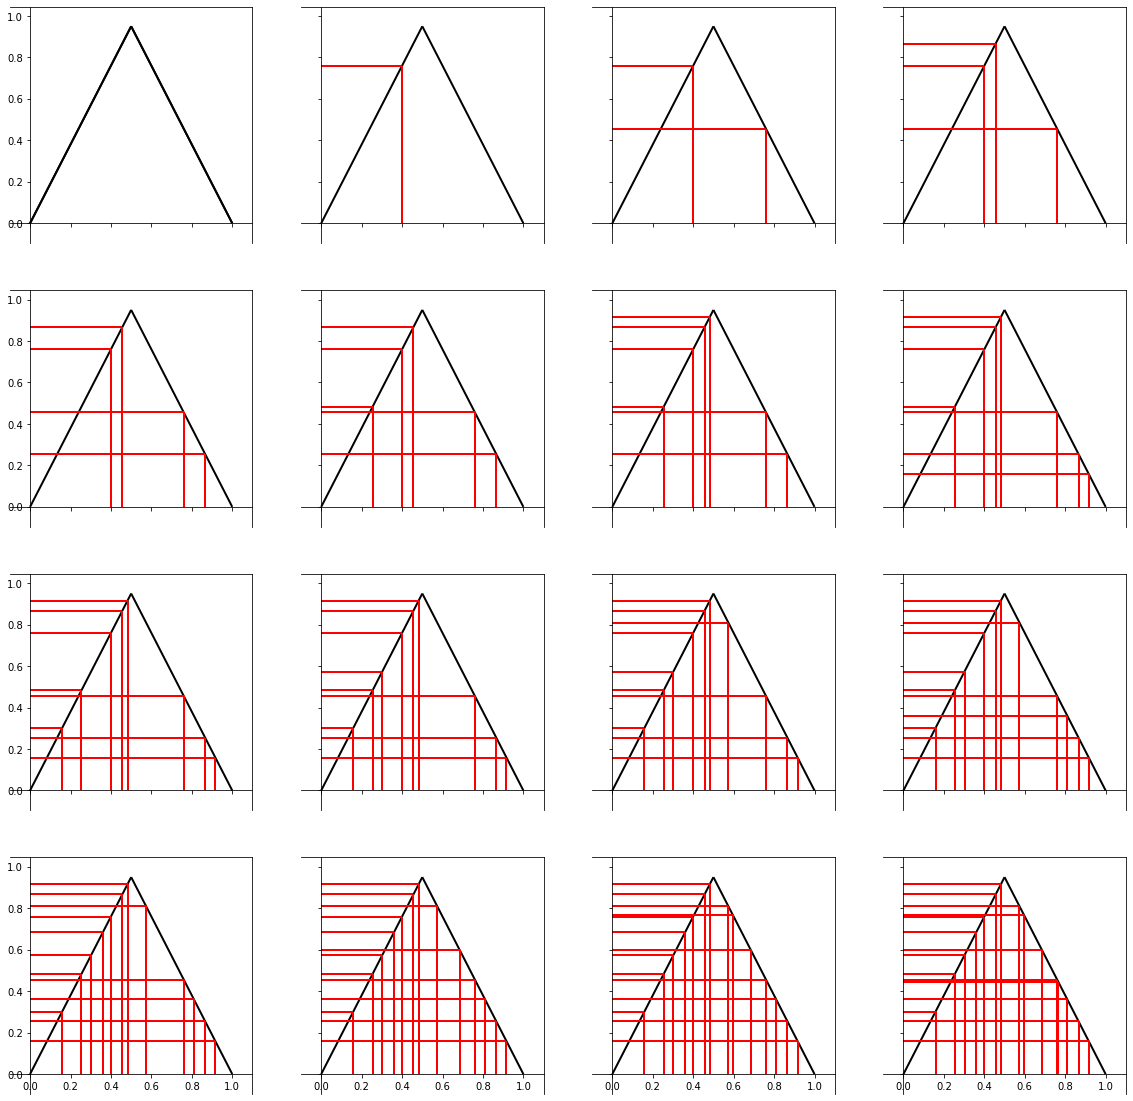

In [7]:
# Plot trajectories
red = (1, 0, 0, 1)

fig, axes = plt.subplots(4, 4, figsize=(20, 20), sharex=True, sharey=True)
plot_lines(axes[0, 0], base_figure=base_figure, base_color=black)

figure_list = []
current_point = start_point
for i in range(23):
    next_point = tent.f([current_point]).take(0)
    figure_list = figure_list + [
        [(current_point, 0), (current_point, next_point.take(0))],
        [(current_point, next_point.take(0)), (0, next_point.take(0))]
    ]
    current_point = next_point

for i, ax in enumerate(axes.flatten()):
    plot_lines(
        ax,
        base_figure=base_figure,
        base_color=black,
        figure_list=figure_list[:i*2],
        figures_color=red,
    )

In [8]:
# calculating lyapunov exponent of the map
tent_le = LyapunovExponents(map=tent)
tent_solution = tent_le.calculate_from_initial_conditions([0.4])
print(f"Lyapunov Exponent = {tent_solution}")

Lyapunov Exponent = [0.64185389]


## Henon
## b)

In [46]:
# generating start points in between 0.25 and 0.75 XY Grid
import random
from ntsa.algorithms.maps import Henon

# creating henon map with a=1.4 and b=0.3
henon_map = Henon(a=1.4, b=0.3)

# number of points
n = 1000

start_xs = [random.uniform(0.25, 0.75) for i in range(n)]
start_ys = [random.uniform(0.25, 0.75) for i in range(n)]

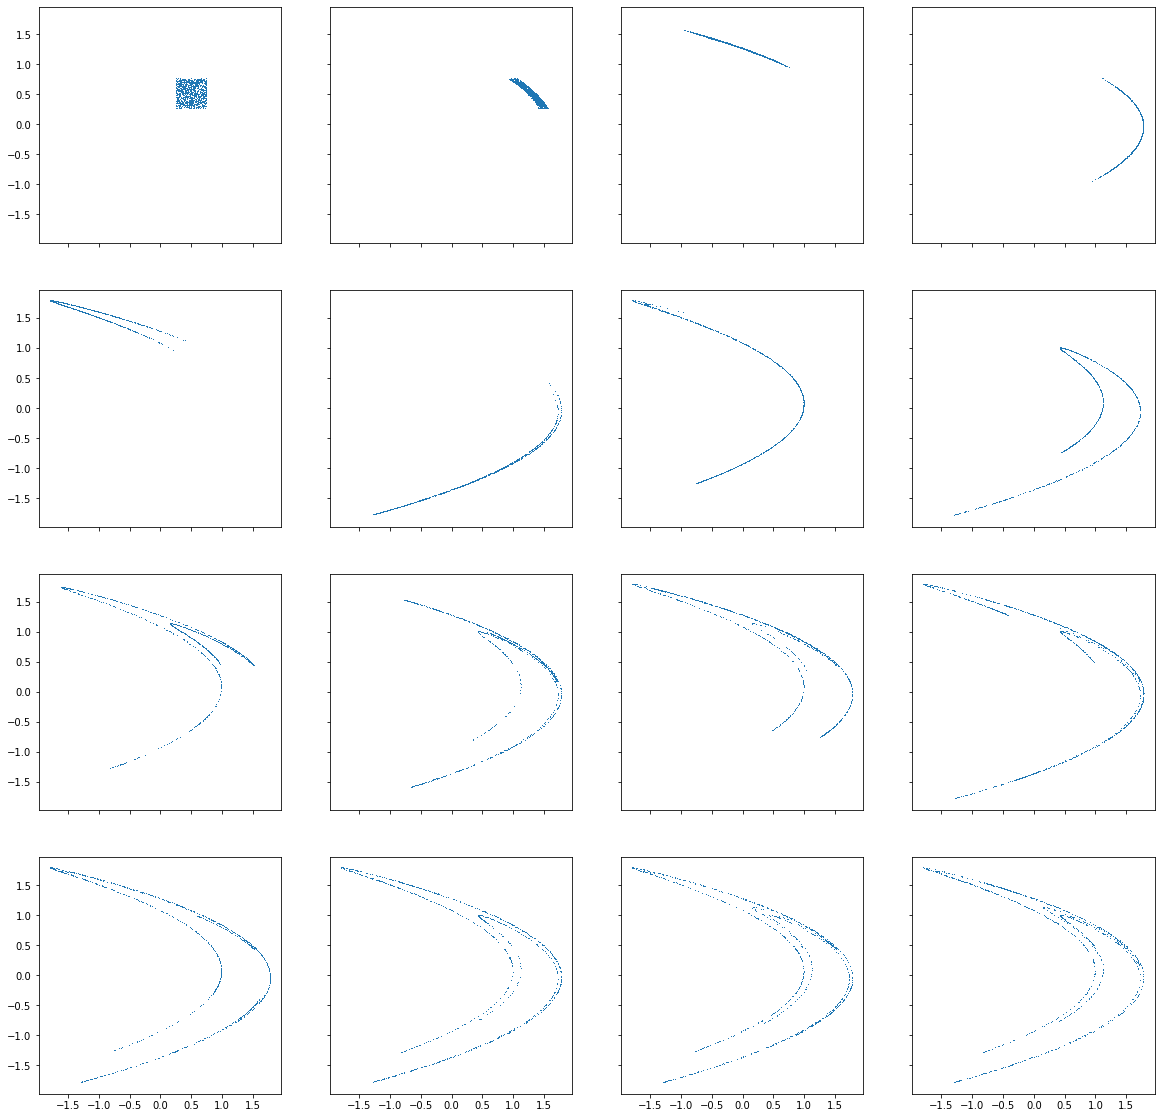

In [50]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20), sharex=True, sharey=True, )

# plotting the 24 iterations applying the Henon map, we can see the attractor getting formed
xs = start_xs
ys = start_ys
for i, ax in enumerate(axes.flatten()):
    ax.plot(xs, ys, ',')
    next_points = [henon_map.f([x, y]) for x, y in zip(xs, ys)]
    xs, ys = zip(*next_points)

## C

In [11]:
# Calculating Lyapunov Exponents from [0,0] starting point : 

henon_le = LyapunovExponents(map=henon_map)
henon_solution = henon_le.calculate_from_initial_conditions([0, 0])
print(henon_solution)

[-1.60350901  0.39953621]


## 2)
## Lorenz
## a) and b)

In [12]:
from ntsa.algorithms.maps import Lorenz

lorenz_map = Lorenz(sigma=10, rho=28, beta=8 / 3)

starting_point = [0, 2, 0]

In [13]:
# Calculating Lyapunov

solver = LyapunovExponents(lorenz_map, tolerance=0.0001, max_iterations=10000)
solver.calculate_from_initial_conditions(starting_point)

array([-1.45699626e+01,  2.04232901e-03,  9.01254207e-01])

In [14]:
# generating orbit from (0, 2, 0)

number_of_points = 10000
dt = 0.01

xs, ys, zs = generate_orbit_xyz(
    initial_condition=(0, 2, 0),
    map_=lorenz_map,
    dt=0.01,
    steps=number_of_points
)

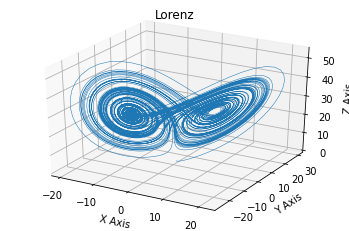

In [15]:
# Plot

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz")

plt.show()

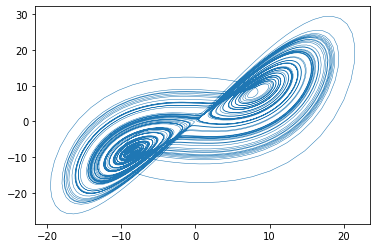

In [16]:
# Plot X and Y axes

plt.plot(xs, ys, lw=0.5)

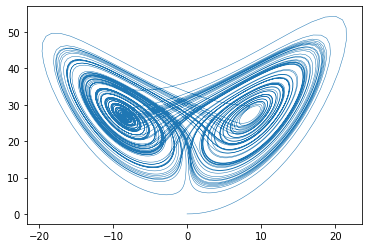

In [17]:
# Plot X and Z axes

plt.plot(xs, zs, lw=0.5)

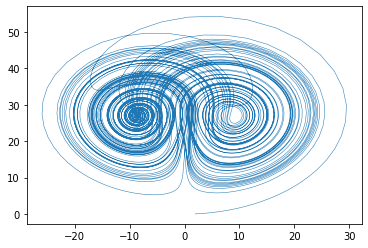

In [18]:
# Plot Y and Z axes

plt.plot(ys, zs, lw=0.5)

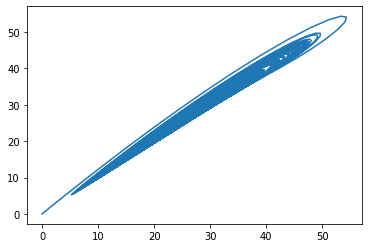

In [19]:
# Zi by Zi+1
plt.plot(zs[:number_of_points], zs[1:])

## c)

Text(0.5, 1.0, 'Plot points between ts 100 and 3000')

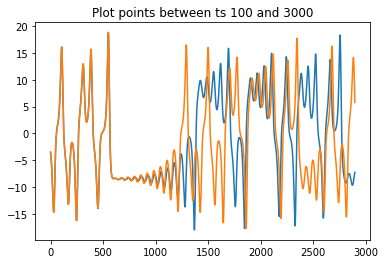

In [20]:
# Little diferences in initial conditions diverge a lot

number_of_points = 10000
dt = 0.01

diff = 0.0001

# start point 1
xs, ys, zs = generate_orbit_xyz(
    initial_condition=(0, 2, 0),
    map_=lorenz_map,
    dt=0.01,
    steps=number_of_points
)

# start point 2
xs2, ys2, zs2 = generate_orbit_xyz(
    initial_condition=(0 + diff, 2 + diff, 0 + diff),
    map_=lorenz_map,
    dt=0.01,
    steps=number_of_points
)

plt.plot(xs[100:3000])
plt.plot(xs2[100:3000])
plt.title("Plot points between ts 100 and 3000")

## Rössler
## d)

In [35]:
from ntsa.algorithms.maps import Rossler

rossler_map = Rossler(a=0.1, b=0.1, c=14)

starting_point = [0, 2, 1]

In [36]:
# Calculating Lyapunov

solver = LyapunovExponents(rossler_map, tolerance=0.0001, max_iterations=10000)
solver.calculate_from_initial_conditions(starting_point)

array([ 0.06611168,  0.07243824, 14.05875559])

In [32]:
# generating orbit from (0, 2, 1)

number_of_points = 10000
dt = 0.01

xs, ys, zs = generate_orbit_xyz(
    initial_condition=(0, 2, 1),
    map_=rossler_map,
    dt=0.01,
    steps=number_of_points
)

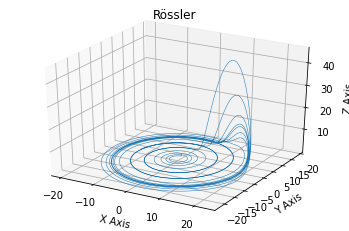

In [33]:
# Plot

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Rössler")

plt.show()

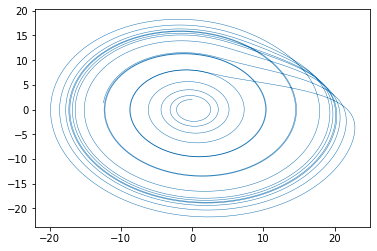

In [34]:
# Plot X and Y axes

plt.plot(xs, ys, lw=0.5)

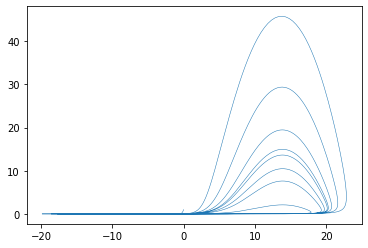

In [27]:
# Plot X and Z axes

plt.plot(xs, zs, lw=0.5)

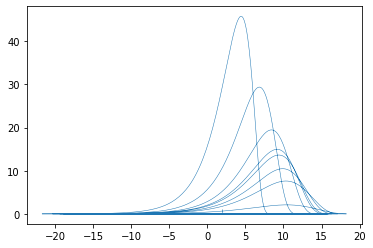

In [28]:
# Plot Y and Z axes

plt.plot(ys, zs, lw=0.5)

## e)

Text(0.5, 1.0, 'Plot points between ts 0 and 10000 steps')

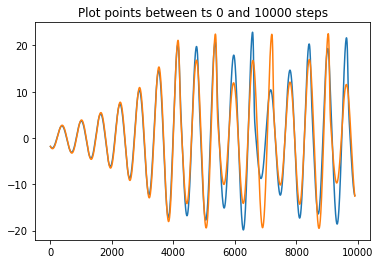

In [45]:
# Ploting orbits with little diferences in initial conditions

number_of_points = 10000
dt = 0.01

diff = 0.1

# start point 1
xs, ys, zs = generate_orbit_xyz(
    initial_condition=(0, 2, 1),
    map_=rossler_map,
    dt=0.01,
    steps=number_of_points
)

# start point 2
xs2, ys2, zs2 = generate_orbit_xyz(
    initial_condition=(0 + diff, 2 + diff, 0 + diff),
    map_=rossler_map,
    dt=0.01,
    steps=number_of_points
)

plt.plot(xs[100:10000])
plt.plot(xs2[100:10000])
plt.title("Plot points between ts 0 and 10000 steps")

As we can see, Rössler map do not diverge as much as Lorenz, even with a much larger initial difference

## f) Comparing C=4, C=6, C=8.7 and C=12.8, with periods 1, 2, 8 and 6 respectively

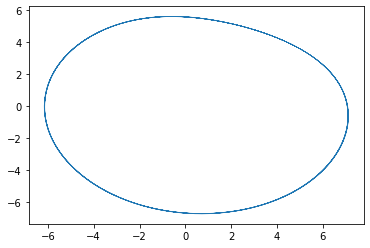

In [83]:
# C = 4

rossler_map = Rossler(a=0.1, b=0.1, c=4)

number_of_points = 10000
dt = 0.01

xs, ys, zs = generate_orbit_xyz(
    initial_condition=(0, -6, 0),
    map_=rossler_map,
    dt=0.01,
    steps=number_of_points
)

# Plot X and Y axes, discarding first 5000 points
plt.plot(xs[5000:], ys[5000:], lw=0.5)

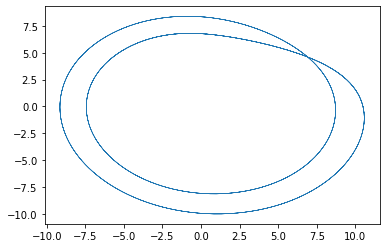

In [84]:
# C = 6

rossler_map = Rossler(a=0.1, b=0.1, c=6)

number_of_points = 10000
dt = 0.01

xs, ys, zs = generate_orbit_xyz(
    initial_condition=(0, -6, 0),
    map_=rossler_map,
    dt=0.01,
    steps=number_of_points
)

# Plot X and Y axes, discarding first 5000 points
plt.plot(xs[5000:], ys[5000:], lw=0.5)

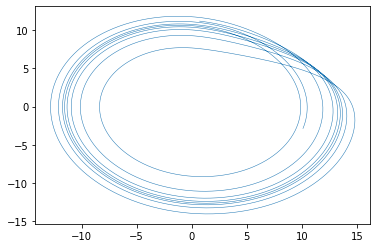

In [85]:
# C = 8.7

rossler_map = Rossler(a=0.1, b=0.1, c=8.7)

number_of_points = 10000
dt = 0.01

xs, ys, zs = generate_orbit_xyz(
    initial_condition=(0, -6, 0),
    map_=rossler_map,
    dt=0.01,
    steps=number_of_points
)

# Plot X and Y axes, discarding first 5000 points
plt.plot(xs[5000:], ys[5000:], lw=0.5)

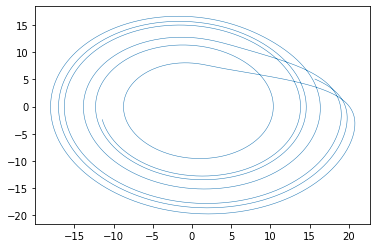

In [97]:
# C = 12.6

rossler_map = Rossler(a=0.1, b=0.1, c=12.6)

number_of_points = 10000
dt = 0.01

xs, ys, zs = generate_orbit_xyz(
    initial_condition=(0, -6, 0),
    map_=rossler_map,
    dt=0.01,
    steps=number_of_points
)

# Plot X and Y axes, discarding first 6000 points
plt.plot(xs[6000:], ys[6000:], lw=0.5)